<a href="https://colab.research.google.com/github/moey920/Object-Detection/blob/master/Pre_trained_Word_Embedding_02_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)
이번엔 케라스의 임베딩 층(embedding layer)과 사전 훈련된 워드 임베딩(pre-trained word embedding)을 가져와서 사용하는 것을 비교해봅니다. 자연어 처리를 하려고 할 때 갖고 있는 훈련 데이터의 단어들을 임베딩 층(embedding layer)을 구현하여 임베딩 벡터로 학습하는 경우가 있습니다. 케라스에서는 이를 Embedding()이라는 도구를 사용하여 구현합니다.

그런데 위키피디아 등과 같은 방대한 코퍼스를 가지고 Word2vec, FastText, GloVe 등을 통해서 이미 미리 훈련된 임베딩 벡터를 불러오는 방법을 사용하는 경우도 있습니다. 이는 현재 갖고 있는 훈련 데이터를 임베딩 층으로 처음부터 학습을 하는 방법과는 대조됩니다.

# 케라스 임베딩 층(Keras Embedding layer)
케라스는 훈련 데이터의 단어들에 대해 워드 임베딩을 수행하는 도구 Embedding()을 제공합니다. Embedding()은 인공 신경망 구조 관점에서 임베딩 층(embedding layer)을 구현합니다.


## 1) 임베딩 층은 룩업 테이블이다.
임베딩 층의 입력으로 사용하기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어있어야 합니다.

어떤 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터

임베딩 층은 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑하고 이 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련됩니다. 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트 됩니다. 그리고 이 밀집 벡터를 임베딩 벡터라고 부릅니다.

정수를 밀집 벡터 또는 임베딩 벡터로 맵핑한다는 것은 어떤 의미일까요? 특정 단어와 맵핑되는 정수를 인덱스로 가지는 테이블로부터 임베딩 벡터 값을 가져오는 룩업 테이블이라고 볼 수 있습니다. 그리고 이 테이블은 단어 집합의 크기만큼의 행을 가지므로 모든 단어는 고유한 임베딩 벡터를 가집니다.

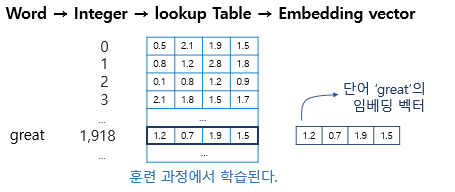



위의 그림은 단어 great이 정수 인코딩 된 후 테이블로부터 해당 인덱스에 위치한 임베딩 벡터를 꺼내오는 모습을 보여줍니다. 위의 그림에서는 임베딩 벡터의 차원이 4로 설정되어져 있습니다. 그리고 단어 great은 정수 인코딩 과정에서 1,918의 정수로 인코딩이 되었고 그에 따라 단어 집합의 크기만큼의 행을 가지는 테이블에서 인덱스 1,918번에 위치한 행을 단어 great의 임베딩 벡터로 사용합니다. 이 임베딩 벡터는 모델의 입력이 되고, 역전파 과정에서 단어 great의 임베딩 벡터값이 학습됩니다.

룩업 테이블의 개념을 이론적으로 우선 접하고, 처음 케라스를 배울 때 어떤 분들은 임베딩 층의 입력이 원-핫 벡터가 아니어도 동작한다는 점에 헷갈려 합니다. 케라스는 단어를 정수 인덱스로 바꾸고 원-핫 벡터로 한번 더 바꾸고나서 임베딩 층의 입력으로 사용하는 것이 아니라, 단어를 정수 인덱스로만 바꾼채로 임베딩 층의 입력으로 사용해도 룩업 테이블 된 결과인 임베딩 벡터를 리턴합니다.

케라스의 임베딩 층 구현 코드를 봅시다.

In [0]:
# 아래의 각 인자는 임의로 선정한 숫자들이며 의미있는 선정 기준이 아님.
v = Embedding(20000, 128, input_length=500)
# vocab_size = 20000
# output_dim = 128
# input_length = 500

임베딩 층은 다음과 같은 세 개의 인자를 받습니다.

vocab_size : 텍스트 데이터의 전체 단어 집합의 크기입니다.
output_dim : 워드 임베딩 후의 임베딩 벡터의 차원입니다.
input_length : 입력 시퀀스의 길이입니다. 만약 갖고있는 각 샘플의 길이가 500개의 단어로 구성되어있다면 이 값은 500이 됩니다.

Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimentionality)인 3D 실수 텐서를 리턴합니다. 케라스의 임베딩 층(embedding layer)을 사용하는 간단한 실습을 진행해보겠습니다.

## 2) 임베딩 층 사용하기

임베딩 층을 복습해보겠습니다. 문장의 긍, 부정을 판단하는 감성 분류 모델을 만들어봅시다.

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [0]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

문장과 레이블 데이터를 만들었습니다. 긍정인 문장은 레이블 1, 부정인 문장은 레이블이 0입니다.

In [3]:
t = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1

print(vocab_size)

16


케라스의 Tokenizer()를 사용하여 토큰화를 시켰습니다.

In [4]:
X_encoded = t.texts_to_sequences(sentences)
print(X_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


각 문장에 대해서 정수 인코딩을 수행합니다.

In [5]:
max_len=max(len(l) for l in X_encoded)
print(max_len)

4


문장 중에서 가장 길이가 긴 문장의 길이는 4입니다.

In [6]:
X_train=pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train=np.array(y_train)
print(X_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


모든 문장을 패딩하여 길이를 4로 만들어주었습니다. 훈련 데이터에 대한 전처리가 끝났습니다. 모델을 설계합니다.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(vocab_size, 4, input_length=max_len)) # 모든 임베딩 벡터는 4차원.
model.add(Flatten()) # Dense의 입력으로 넣기위함.
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


출력층에 1개의 뉴런에 활성화 함수로는 시그모이드 함수를 사용하여 이진 분류를 수행합니다.

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7 samples
Epoch 1/100
7/7 - 0s - loss: 0.6960 - acc: 0.5714
Epoch 2/100
7/7 - 0s - loss: 0.6945 - acc: 0.5714
Epoch 3/100
7/7 - 0s - loss: 0.6931 - acc: 0.5714
Epoch 4/100
7/7 - 0s - loss: 0.6917 - acc: 0.5714
Epoch 5/100
7/7 - 0s - loss: 0.6903 - acc: 0.5714
Epoch 6/100
7/7 - 0s - loss: 0.6889 - acc: 0.5714
Epoch 7/100
7/7 - 0s - loss: 0.6875 - acc: 0.5714
Epoch 8/100
7/7 - 0s - loss: 0.6861 - acc: 0.5714
Epoch 9/100
7/7 - 0s - loss: 0.6848 - acc: 0.5714
Epoch 10/100
7/7 - 0s - loss: 0.6834 - acc: 0.5714
Epoch 11/100
7/7 - 0s - loss: 0.6820 - acc: 0.5714
Epoch 12/100
7/7 - 0s - loss: 0.6806 - acc: 0.5714
Epoch 13/100
7/7 - 0s - loss: 0.6792 - acc: 0.5714
Epoch 14/100
7/7 - 0s - loss: 0.6777 - acc: 0.5714
Epoch 15/100
7/7 - 0s - loss: 0.6763 - acc: 0.5714
Epoch 16/100
7/7 - 0s - loss: 0.6749 - acc: 0.5714
Epoch 17/100
7/7 - 0s - loss: 0.6735 - acc: 0.5714
Epoch 18/100
7/7 - 0s - loss:

테스트 데이터에 대한 정확도가 아니며 훈련 데이터도 양이 적어서 정확도에 의미는 없지만, 여기서 말하고자 하는 점은 현재 각 단어들의 임베딩 벡터들의 값은 학습 과정에서 다른 가중치들과 함께 학습된 값입니다.

# 사전 훈련된 워드 임베딩(Pre-Trained Word Embedding) 사용하기

임베딩 벡터를 얻기 위해서 케라스의 Embedding()을 사용하기도 하지만, 때로는 이미 훈련되어져 있는 워드 임베딩을 불러서 이를 임베딩 벡터로 사용하기도 합니다. 훈련 데이터가 적은 상황이라면 모델에 케라스의 Embedding()을 사용하는 것보다 다른 텍스트 데이터로 사전 훈련되어 있는 임베딩 벡터를 불러오는 것이 나은 선택일 수 있습니다.

훈련 데이터가 적다면 케라스의 Embedding()으로 해당 문제에 충분히 특화된 임베딩 벡터를 만들어내는 것이 쉽지 않습니다. 차라리 해당 문제에 특화된 임베딩 벡터를 만드는 것이 어렵다면, 해당 문제에 특화된 것은 아니지만 보다 일반적이고 보다 많은 훈련 데이터로 이미 Word2Vec이나 GloVe 등으로 학습되어져 있는 임베딩 벡터들을 사용하는 것이 성능의 개선을 가져올 수 있습니다.

사전 훈련된 GloVe와 Word2Vec 임베딩을 사용해서 모델을 훈련시키는 실습을 진행해봅시다.

GloVe 다운로드 링크 : http://nlp.stanford.edu/data/glove.6B.zip

Word2Vec 다운로드 링크 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM

훈련 데이터는 앞서 사용했던 데이터에 동일한 전처리가 수행된 상태라고 가정하겠습니다.

In [9]:
print(X_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [10]:
print(y_train)

[1 0 0 1 1 0 1]


## 1) 사전 훈련된 GloVe 사용하기

이제 임베딩 층을 설계하기 위한 과정부터 달라집니다. 우선 다운로드 받은 파일인 glove.6B.zip의 압축을 풀면 그 안에 4개의 파일이 있는데 여기서 사용할 파일은 glove.6B.100d.txt 파일입니다. 해당 파일은 하나의 줄당 101개의 값을 가지는 리스트를 갖고 있습니다. 두 개의 줄만 읽어보도록 하겠습니다.

### [꿀팁]Colab에서 구글 드라이브 마운트를 통해 파일 가져오기
Colab에서 구글 드라이브 API를 통해 굳이 연결하지 않더라도,
Colab 왼쪽 상단을 보면 폴더 모양의 아이콘이 있습니다. 이를 클릭하고
드라이브 마운트를 통해 계정에 연결해놓으면 개인 구글 드라이브에 있는 폴더들이 나타납니다.
이 중 content/drive/Mydrive/ 로 들어가면 자신의 구글 드라이브에 있는 폴더와 파일들이 나타납니다.
사용하고자 하는 파일을 우클릭하고 경로를 복사하면
f = open('복사한 경로 붙여넣기')를 통해
간편하게 사용할 수 있습니다.

In [11]:
n=0
f = open('/content/drive/My Drive/text/data.txt', encoding="utf8")

for line in f:
    word_vector = line.split() # 각 줄을 읽어와서 word_vector에 저장.
    print(word_vector) # 각 줄을 출력
    word = word_vector[0] # word_vector에서 첫번째 값만 저장
    print(word) # word_vector의 첫번째 값만 출력
    n=n+1
    if n==2:
        break
f.close()

['CI올리브영(', ')', '이정', '부대로', '|||||||||']
CI올리브영(
['경기도', '의정부시', '평화로', '552', '|', ':031-', '856', '-', '5290']
경기도


In [12]:
print(type(word_vector))
print(len(word_vector))

<class 'list'>
9


101개의 값 중에서 첫번째 값은 임베딩 벡터가 의미하는 단어를 의미하며, 
두번째 값부터 마지막 값은 해당 단어의 임베딩 벡터의 100개의 차원에서의 각 값을 의미합니다. 

즉, glove.6B.100d.txt는 수많은 단어에 대해서 100개의 차원을 가지는 임베딩 벡터로 제공하고 있습니다. 

위의 출력 결과는 단어 'the'에 대해서 100개의 차원을 가지는 임베딩 벡터와 단어 ','에 대해서 100개의 차원을 가지는 임베딩 벡터를 보여줍니다. 

그러면 이제 glove.6B.100d.txt에 있는 모든 임베딩 벡터들을 불러와보겠습니다. 

형식은 키(key)와 값(value)의 쌍(pair)를 가지는 파이썬의 사전형 구조를 사용합니다.

In [13]:
import numpy as np
embedding_dict = dict()
f = open('/content/drive/My Drive/text/data.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()
print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

ValueError: ignored

### 오류 발생 : 전처리 되지 않은 텍스트에 대한 문제
위의 코드에서 
ValueError: could not convert string to float: ')'
에러가 발생합니다.

이유는 data.txt에 들어있는 텍스트는 전혀 전처리를 거치지 않은 상태이기 때문에 array로 리턴하고자 할 때 ')'이 문제가 되기 때문입니다.

해당 문자만 불용어로 처리하고 다음으로 넘어가는 것은 의미가 없기 때문에 전체 데이터에 대해 전처리를 수행한 후에 사전 훈련된 워드 임베딩을 다시 도전해보겠습니다.


# 전처리 후 재도전